# Import Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

# Plot Time Series

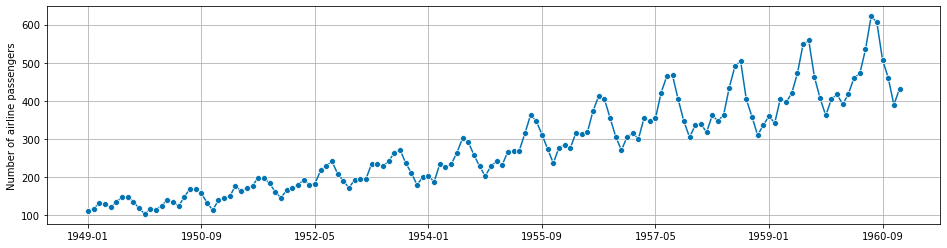

In [2]:
y = load_airline()
plot_series(y)
plt.grid()
plt.show()

# Forecasting Horizon

In [3]:
# Menggunakan numpy array
fh = np.arange(1, 37)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [4]:
fh = np.array([2, 5])
fh

array([2, 5])

In [5]:
# Menggunakan ForecastingHorizon
from sktime.forecasting.base import ForecastingHorizon

fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),
    is_relative=False
)

fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [6]:
cutoff = pd.Period("1960-12", freq="M")
cutoff

Period('1960-12', 'M')

In [7]:
fh.to_relative(cutoff)

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

In [8]:
fh.to_absolute(cutoff)

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

# Menentukan Algoritma

In [9]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last")

# Training

In [10]:
forecaster.fit(y)

NaiveForecaster()

# Predict

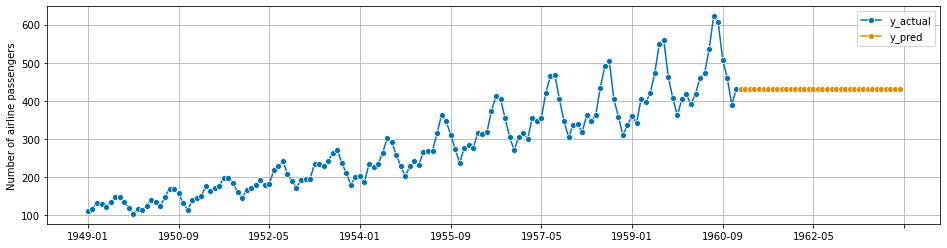

In [11]:
y_pred = forecaster.predict(fh)

plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.grid()

In [12]:
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1949-01", periods=len(y.index) + 12, freq="M")),
    is_relative=False
)

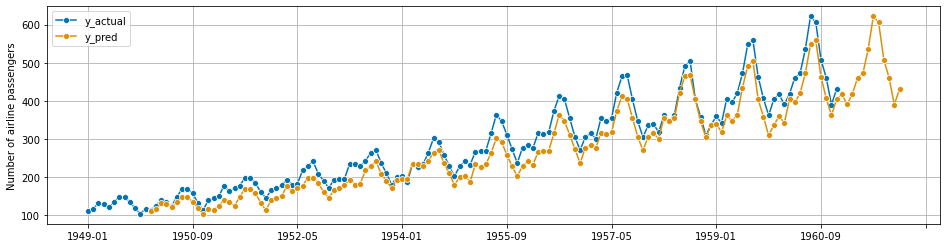

In [13]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.grid()

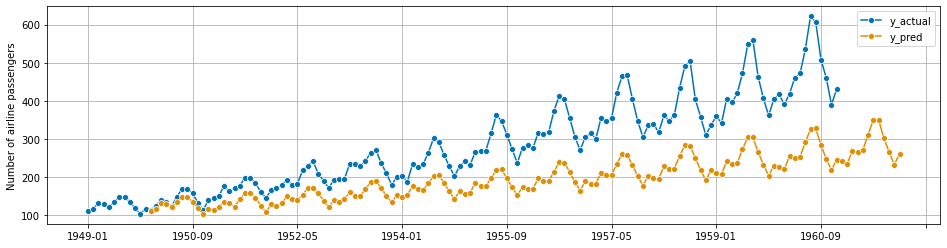

In [14]:
forecaster = NaiveForecaster(strategy="mean", sp=12)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.grid()

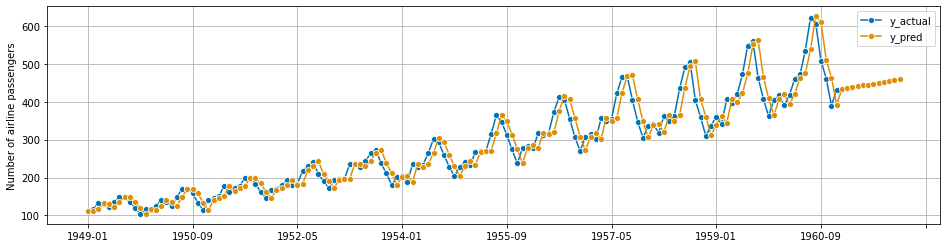

In [15]:
forecaster = NaiveForecaster(strategy="drift", sp=12)
forecaster.fit(y)
y_pred = forecaster.predict(fh)
plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.grid()

# Basic Workflow

In [16]:
y

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

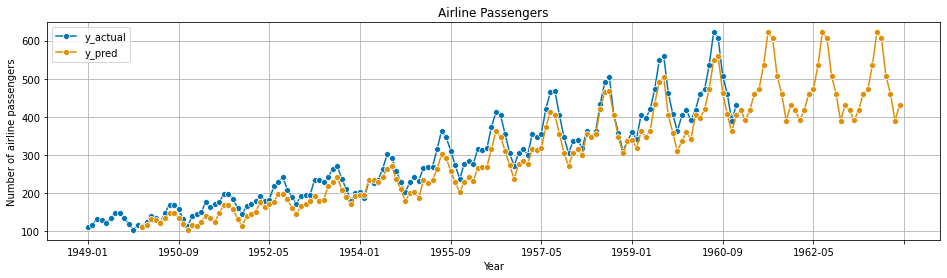

In [17]:
# Import Modules
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
# Load Dataset
y = load_airline()

# Set Forecasting Horizon
fh = np.arange(1, 37) # relative
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1949-01", periods=len(y.index) + 36, freq="M")),
    is_relative=False
) # can absoulte or relative

# Specifying forecasting horizon
forecaster = NaiveForecaster(strategy="last", sp=12)

# Fitting the forecaster
forecaster.fit(y)

# Predict with model
y_pred = forecaster.predict(fh)

# Plot y_actual and y_pred
plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.title("Airline Passengers")
plt.xlabel("Year")
plt.grid()

# Peramal yang membutuhkan Forecasting Horizon

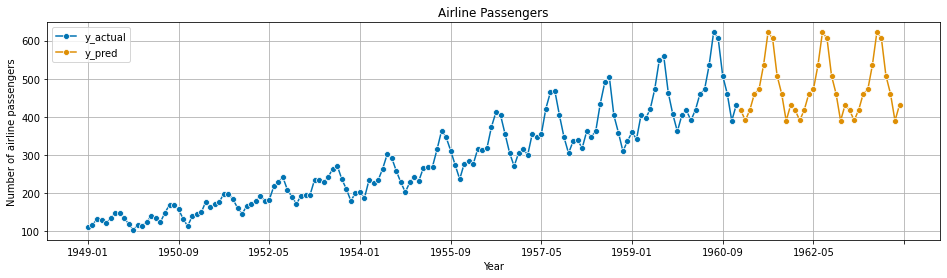

In [18]:
y = load_airline()

fh = np.arange(1, 37)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y, fh=fh)

y_pred = forecaster.predict()

# Plot y_actual and y_pred
plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.title("Airline Passengers")
plt.xlabel("Year")
plt.grid()

# Multivariate Forecasting

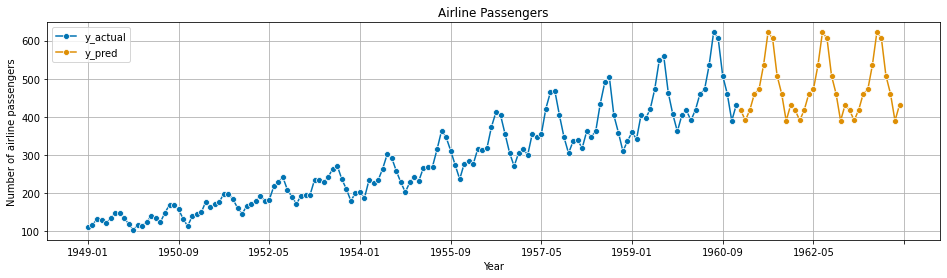

In [19]:
# Step 1: Load Data
y = load_airline()
X = pd.DataFrame(index=y.index) # create dummy exogeneous data

# Specifying forecasting horizon
fh = np.arange(1, 37)
# fh = ForecastingHorizon(
#     pd.PeriodIndex(pd.date_range("1949-01", periods=len(y.index) + 36, freq="M")),
#     is_relative=False
# ) 

# Step 3: Specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# Step 4: Fitting the forecaster
forecaster.fit(y=y, X=X, fh=fh)

# Step 5: Predict
y_pred = forecaster.predict(X=X)

# Step 6: Plot y_actual and y_pred
plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.title("Airline Passengers")
plt.xlabel("Year")
plt.grid()

# Interval Prediction

In [20]:
from sktime.forecasting.theta import ThetaForecaster

y = load_airline()
fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y)

# setting return_pred_int argument to True; alpha determines percentiles
# intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile

coverage = 0.8  # lower=2.5% and upper=97.5% prediction intervals
y_pred = forecaster.predict(fh)
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_quantiles = forecaster.predict_quantiles(alpha=[0.275, 0.975])
y_pred_vars = forecaster.predict_var()
# y_pred_proba = forecaster.predict_proba()

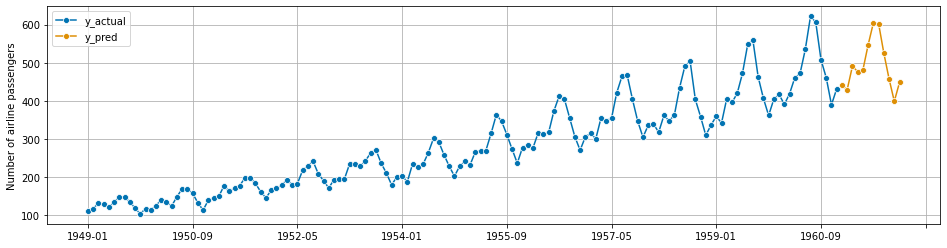

In [21]:
fig, ax = plot_series(y, y_pred, labels=["y_actual", "y_pred"])
plt.grid()

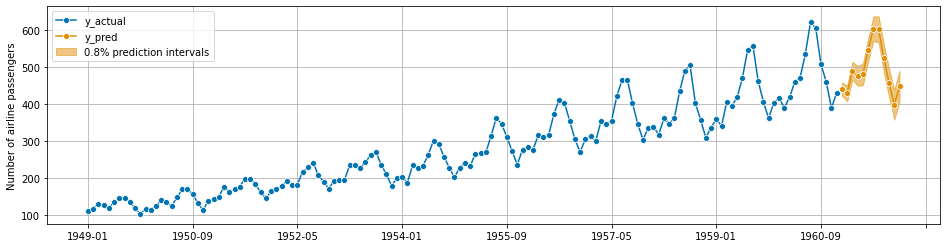

In [22]:
fig, ax = plot_series(y, y_pred, labels=["y_actual", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["Coverage"][coverage]["lower"],
    y_pred_ints["Coverage"][coverage]["upper"],
    alpha=0.5,
    color=ax.get_lines()[-1].get_c(),
    label=f"{coverage}% prediction intervals",
)

ax.legend()
ax.grid()

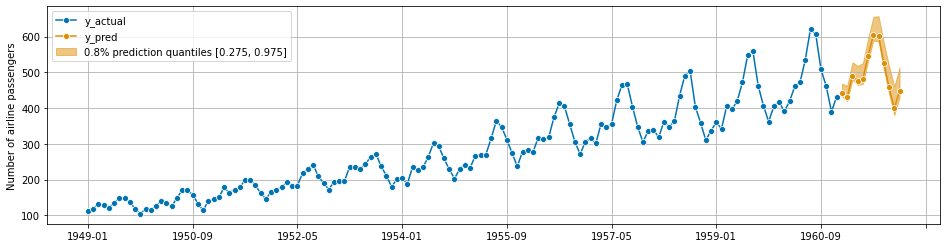

In [23]:
fig, ax = plot_series(y, y_pred, labels=["y_actual", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_quantiles["Quantiles"][0.275],
    y_pred_quantiles["Quantiles"][0.975],
    alpha=0.5,
    color=ax.get_lines()[-1].get_c(),
    label=f"{coverage}% prediction quantiles [0.275, 0.975]",
)

ax.legend()
ax.grid()

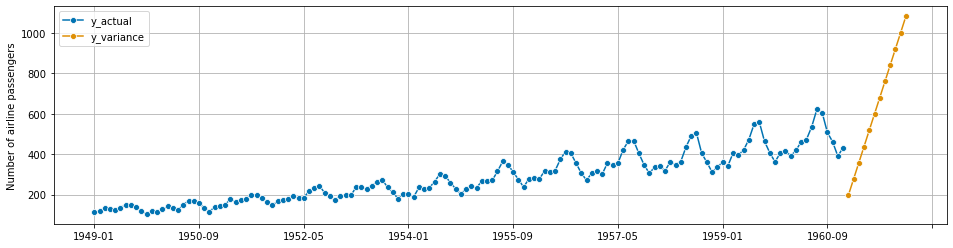

In [24]:
fig, ax = plot_series(y, y_pred_vars[0], labels=["y_actual", "y_variance"])
plt.grid()

# Split dataset

In [25]:
from sktime.forecasting.model_selection import temporal_train_test_split

y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
len(y_train), len(y_test)

(108, 36)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

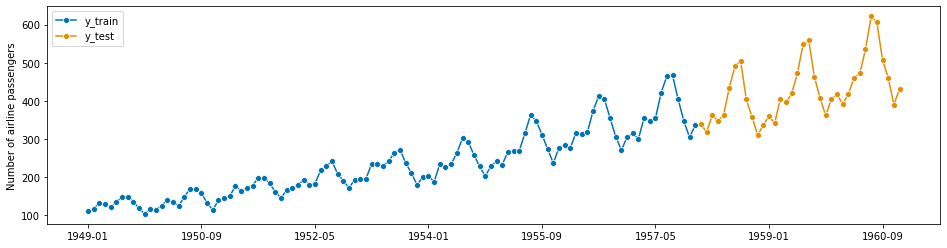

In [26]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])

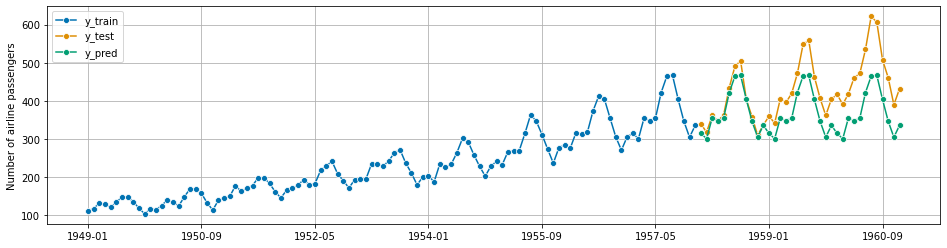

In [27]:
# fh = ForecastingHorizon(
#     y_train.index.append(y_test.index),
#     is_relative=False
# )

fh = ForecastingHorizon(
    y_test.index,
    is_relative=False
)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.grid()

# Evaluation

In [28]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

0.13189432350948402

In [29]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

mape = MeanAbsolutePercentageError(symmetric=False)
mape.greater_is_better

False

In [30]:
mape(y_test, y_pred)

0.13189432350948402

# Basic Workflow Split and Evaluation

## With function

In [31]:
# Step 1: Import Modules
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

# Step 2: Split Dataset
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)

# Step 3: Create forecasting horizon dan forecaster model
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# Step 4 Evaluation
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

0.145427686270316

## With class

In [32]:
# Step 1: Import Modules
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

# Step 2: Split Dataset
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)

# Step 3: Create forecasting horizon dan forecaster model
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# Step 4 Evaluation
mape = MeanAbsolutePercentageError()
mape(y_test, y_pred)

0.145427686270316

# Batch Forecasting

In [33]:
from sktime.datasets import load_airline
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting import plot_series

y = load_airline()

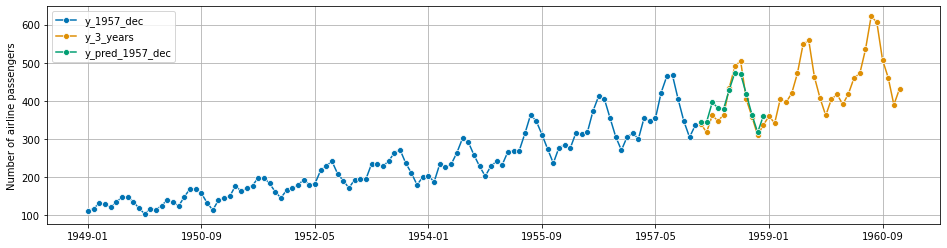

In [34]:
# December 1957
y_1957_dec = y[:-36]
y_3_years = y[-36:]

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

fh = np.arange(1, 13)

forecaster.fit(y_1957_dec)

y_pred_1957_dec = forecaster.predict(fh)

plot_series(y_1957_dec, y_3_years, y_pred_1957_dec, labels=["y_1957_dec", "y_3_years", "y_pred_1957_dec"])
plt.grid()

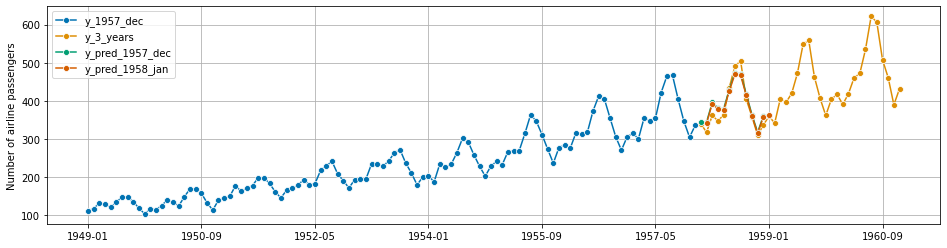

In [35]:
# January 1958

y_1958_jan = y[[-36]]

forecaster.update(y_1958_jan)

y_pred_1958_jan = forecaster.predict(fh)

plot_series(y_1957_dec, y_3_years, y_pred_1957_dec, y_pred_1958_jan, labels=["y_1957_dec", "y_3_years", "y_pred_1957_dec", "y_pred_1958_jan"])
plt.grid()

<Figure size 1200x800 with 0 Axes>

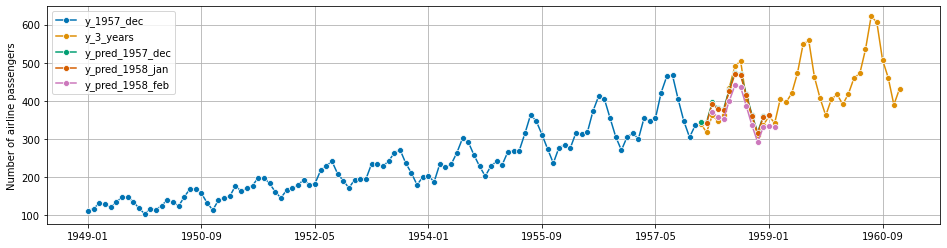

<Figure size 1200x800 with 0 Axes>

In [36]:
# February 1958

y_1958_feb = y[[-35]]

forecaster.update(y_1958_feb)

y_pred_1958_feb = forecaster.predict(fh)

plot_series(y_1957_dec, y_3_years, y_pred_1957_dec, y_pred_1958_jan, y_pred_1958_feb, labels=["y_1957_dec", "y_3_years", "y_pred_1957_dec", "y_pred_1958_jan", "y_pred_1958_feb"])
plt.grid()
plt.figure(dpi=200)

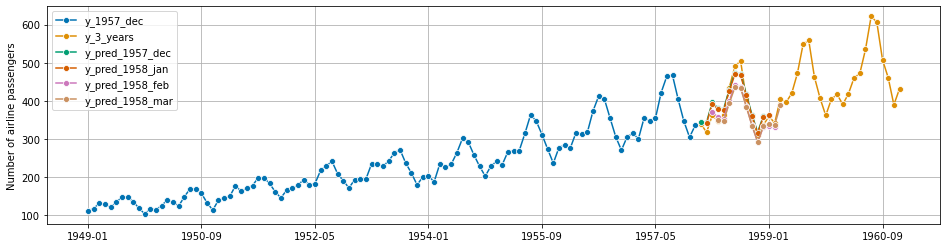

In [37]:
# March 1958

y_1958_mar = y[[-34]]

y_pred_1958_mar = forecaster.update_predict_single(y_1958_mar, fh)

plot_series(y_1957_dec, y_3_years, y_pred_1957_dec, y_pred_1958_jan, y_pred_1958_feb, y_pred_1958_mar, labels=["y_1957_dec", "y_3_years", "y_pred_1957_dec", "y_pred_1958_jan", "y_pred_1958_feb", "y_pred_1958_mar"])
plt.grid()

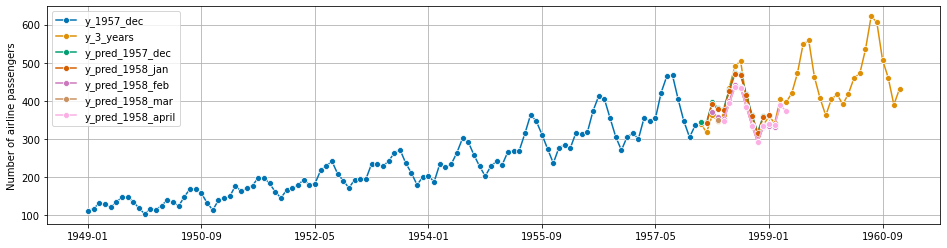

In [38]:
# April 1958

y_1958_april = y[[-33]]
forecaster.update(y_1958_april, update_params=False)

y_pred_1958_april = forecaster.predict(fh)

plot_series(y_1957_dec, y_3_years, y_pred_1957_dec, y_pred_1958_jan, y_pred_1958_feb, y_pred_1958_mar, y_pred_1958_april, labels=["y_1957_dec", "y_3_years", "y_pred_1957_dec", "y_pred_1958_jan", "y_pred_1958_feb", "y_pred_1958_mar", "y_pred_1958_april"])
plt.grid()

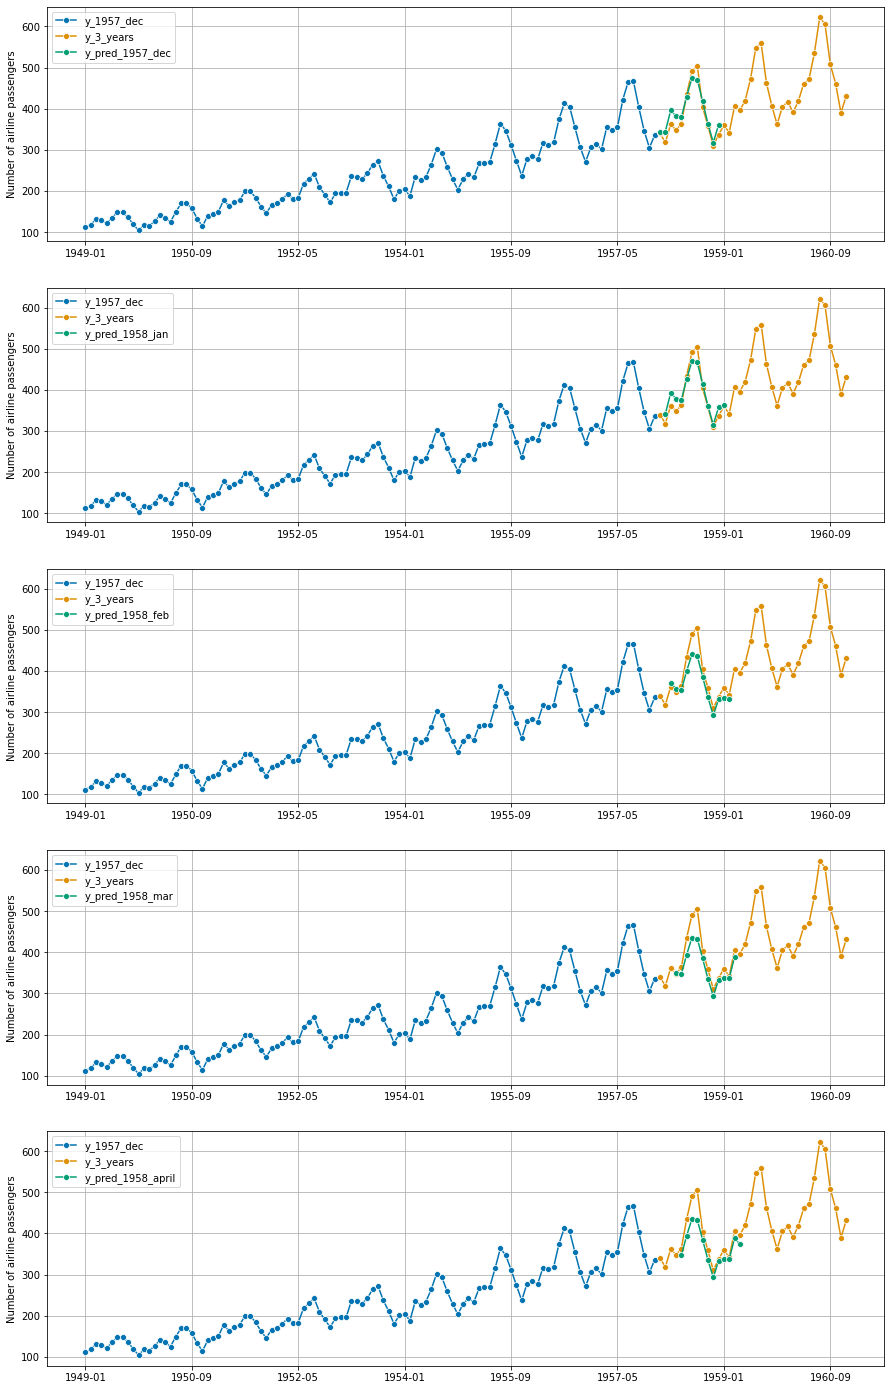

In [39]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

plot_series(y_1957_dec, y_3_years, y_pred_1957_dec, labels=["y_1957_dec", "y_3_years", "y_pred_1957_dec"], ax=ax1)
ax1.grid()

plot_series(y_1957_dec, y_3_years, y_pred_1958_jan, labels=["y_1957_dec", "y_3_years", "y_pred_1958_jan"], ax=ax2)
ax2.grid()

plot_series(y_1957_dec, y_3_years, y_pred_1958_feb, labels=["y_1957_dec", "y_3_years", "y_pred_1958_feb"], ax=ax3)
ax3.grid()

plot_series(y_1957_dec, y_3_years, y_pred_1958_mar, labels=["y_1957_dec", "y_3_years", "y_pred_1958_mar"], ax=ax4)
ax4.grid()

plot_series(y_1957_dec, y_3_years, y_pred_1958_april, labels=["y_1957_dec", "y_3_years", "y_pred_1958_april"], ax=ax5)
ax5.grid()

# Expanding Window Splitter

In [40]:
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.performance_metrics.forecasting import MeanSquaredError

forecaster = AutoARIMA(sp=12, suppress_warnings=True)

cv = ExpandingWindowSplitter(
    step_length=12,
    fh=list(range(1, 13)),
    initial_window=72
)

rmse = MeanSquaredError(square_root=True)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True, scoring=rmse)

In [41]:
forecaster.get_fitted_params

<bound method _PmdArimaAdapter.get_fitted_params of AutoARIMA(sp=12, suppress_warnings=True)>

In [42]:
df["test_MeanSquaredError"].mean()

22.0865771085614

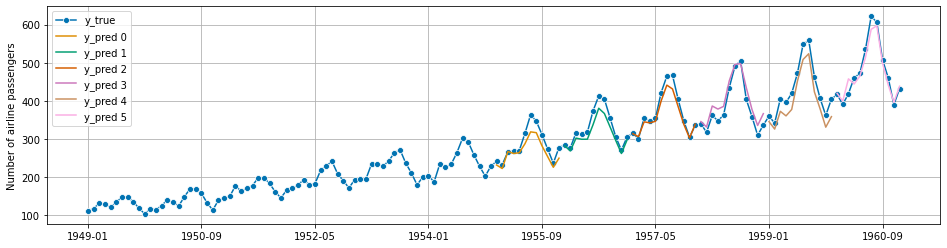

In [43]:
fig, ax = plot_series(
    y,
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    markers=["o", "", "", "", "", "", ""],
    labels=["y_true"] + ["y_pred " + str(i) for i in range(6)]
)

ax.grid()

# Other Forecaster

In [45]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.utils.plotting import plot_series

y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)
# plot_series(y_train, y_train_pred, y_test, y_test_pred, y_future, labels=["y_train", "y_train_pred", "y_test", "y_test_pred", "y_future"])
# plt.grid()

def plot_forecast(forecaster, y_train, y_test, fh_future):
    forecaster.fit(y_train)
    y_train_pred = forecaster.predict(y_train.index)
    y_test_pred = forecaster.predict(y_test.index)
    y_future = forecaster.predict(fh_future)
    plot_series(y_train, y_train_pred, y_test, y_test_pred, y_future, labels=["y_train", "y_train_pred", "y_test", "y_test_pred", "y_future"])
    plt.grid()
    print(f"RMSE: {mean_squared_error(y_test, y_test_pred, square_root=True)}")


def forecast(forcaster, fh, y_train, y_test, y_test_pred):
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    plot_series(y_train, y_test, y_test_pred, labels=["y_train", "y_test", "y_test_pred"])
    plt.grid()
    print(f"RMSE: {mean_squared_error(y_test, y_test_pred, square_root=True)}")

## Exponential Smoothing

RMSE: 26.375836858562828


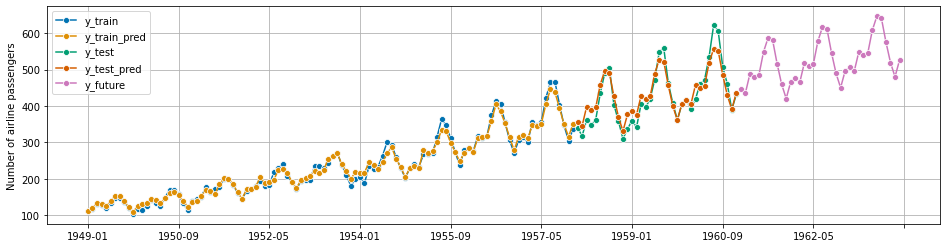

In [46]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

forecaster = ExponentialSmoothing(trend="add", seasonal="add", sp=12)
fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

## AutoETS (Auto Exponential Smoothing)

RMSE: 33.97349456263429


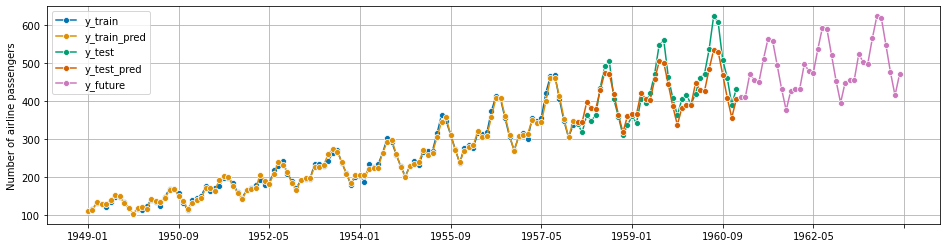

In [47]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)
fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

## ARIMA

RMSE: 21.18778149297459


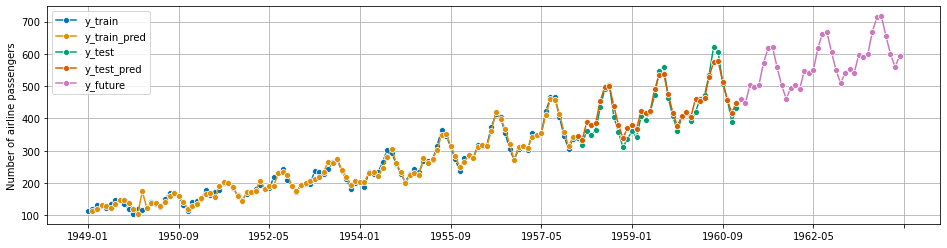

In [48]:
from sktime.forecasting.arima import ARIMA

forecaster = ARIMA(
    order=(1, 1, 0),
    seasonal_order=(0, 1, 0, 12),
    suppress_warnings=True
)

fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

## AutoARIMA

RMSE: 22.132236754717276


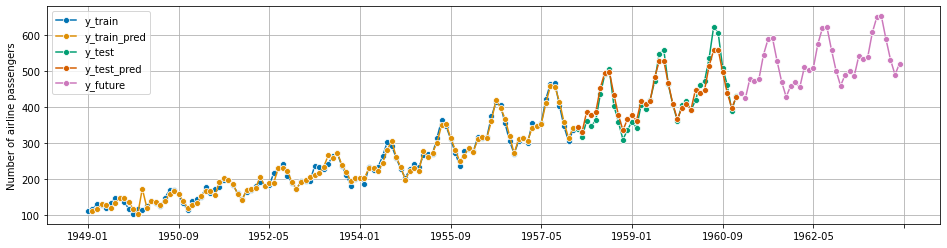

In [49]:
from sktime.forecasting.arima import AutoARIMA

forecaster = AutoARIMA(sp=12, suppress_warnings=True)
fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

In [50]:
forecaster.get_fitted_params()

{'ar.L1': -0.2411177593160947,
 'sigma2': 92.74985957133522,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'aic': 704.0011679025909,
 'aicc': 704.1316026851996,
 'bic': 709.108921685792,
 'hqic': 706.0650836395923}

## BATS

RMSE: 54.5296035265883


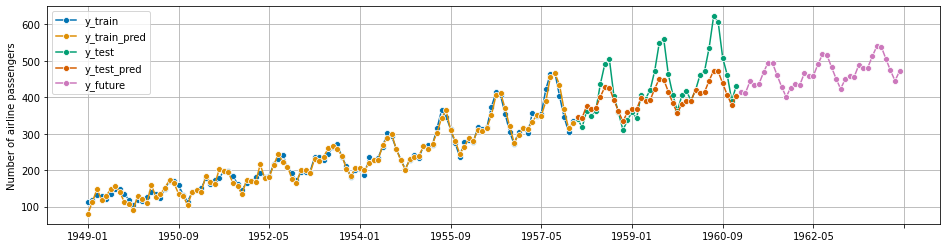

In [51]:
from sktime.forecasting.bats import BATS

forecaster = BATS(sp=12, use_trend=True, use_box_cox=False)
fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

## TBATS

RMSE: 53.36423527634928


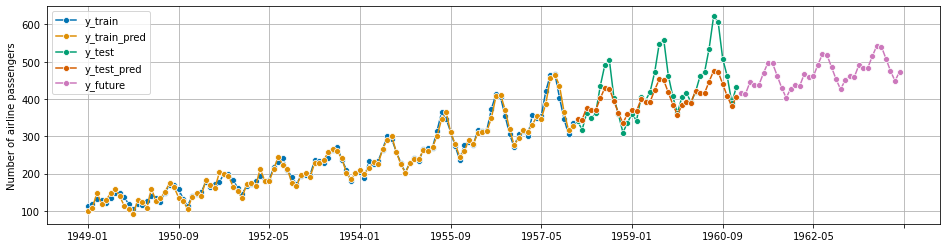

In [52]:
from sktime.forecasting.tbats import TBATS

forecaster = TBATS(sp=12, use_trend=True, use_box_cox=False)
fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

## fbprophet

0.06939056917256975

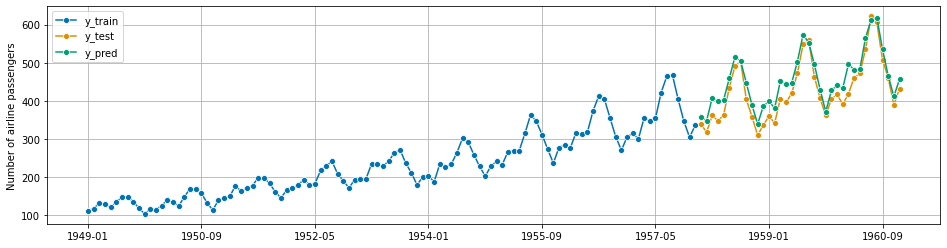

In [53]:
from sktime.forecasting.fbprophet import Prophet

z = y.copy()
z = z.to_timestamp(freq="M")
z_train, z_test = temporal_train_test_split(z, test_size=36)

forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

forecaster.fit(z_train)
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))
y_pred.index = y_test.index

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.grid()
mean_absolute_percentage_error(y_test, y_pred)

## Unobserved Components

RMSE: 24.53657629278019


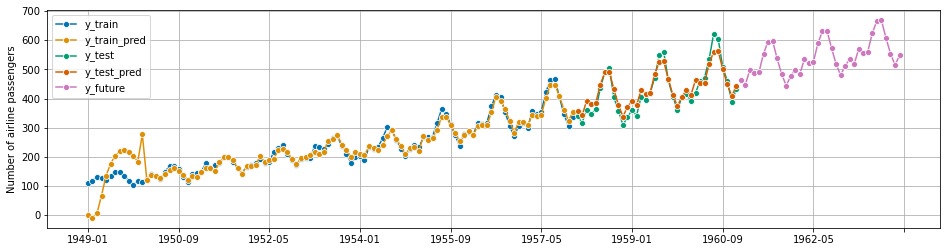

In [54]:
from sktime.forecasting.structural import UnobservedComponents

forecaster = UnobservedComponents(
    level="local linear trend",
    freq_seasonal=[{"period": 12, "harmonics": 10}]
)

fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

# Advanced Composition Patterns

In [55]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

## Make Reduction

RMSE: 37.49051805915437


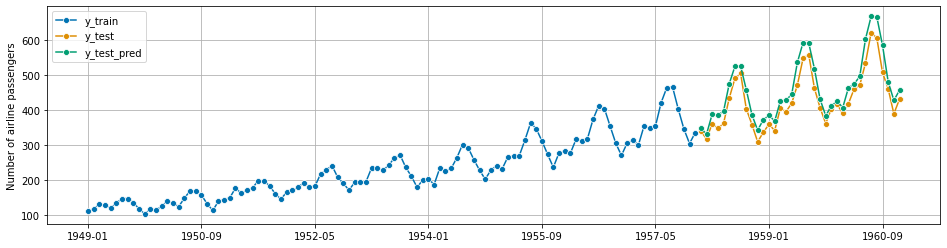

In [56]:
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction

regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
forecaster.fit(y_train)
y_test_pred = forecaster.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

In [58]:
y_future = forecaster.predict(fh_future)
# plot_series(y_train, y_train_pred, y_test, y_test_pred, y_future, labels=["y_train", "y_train_pred", "y_test", "y_test_pred", "y_future"])
# plt.grid()

## Pipeline

RMSE: 81.03228271293415


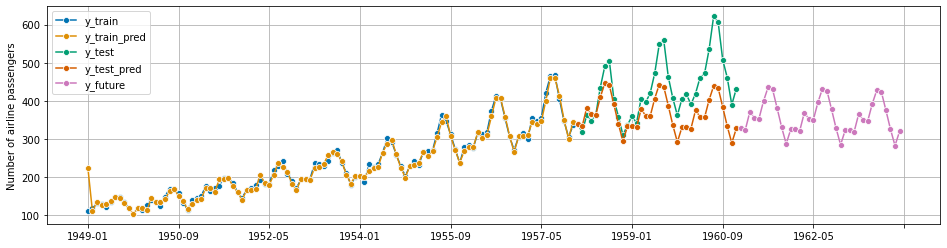

In [59]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
        ("forecast", ARIMA())
    ]
)

fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

## The Detrender as pipeline component

RMSE: 70.63707081783774


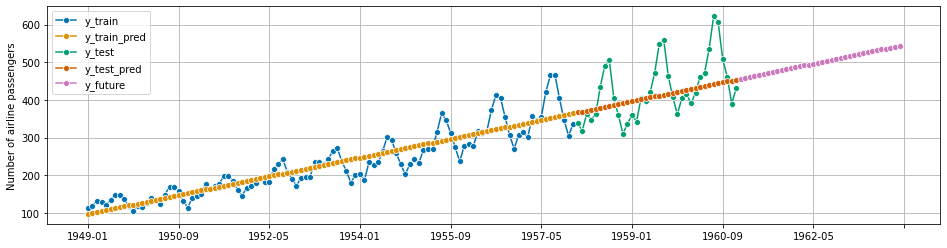

In [60]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Detrender

# Linear Detrending
forecaster = PolynomialTrendForecaster(degree=1)
transformer = Detrender(forecaster=forecaster)
y_t = transformer.fit_transform(y_train)

# internally, the Detrender uses the in-sample predictions
# of the PolynomialTrendForecaster
forecaster = PolynomialTrendForecaster(degree=1)
fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

RMSE: 32.42301566218137


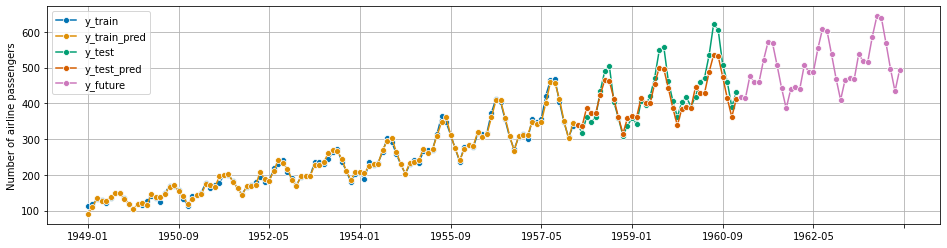

In [61]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
        ("detrender", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
        ("forecast", ARIMA())
    ]
)

fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")),is_relative=False
)

plot_forecast(forecaster, y_train, y_test, fh_future)

# Complex Pipeline

RMSE: 26.68630958016309


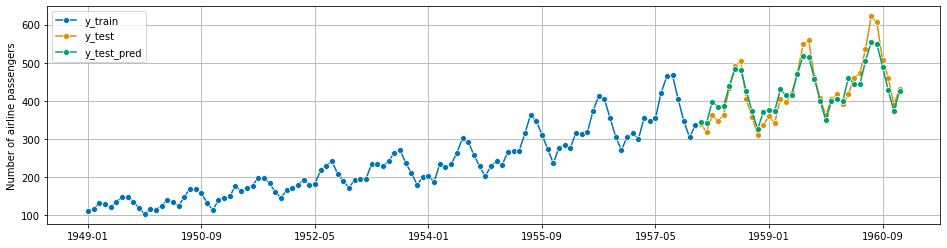

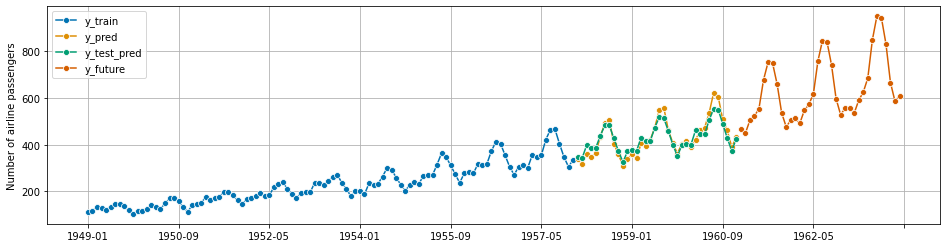

In [62]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
        (
            "forecast",
            make_reduction(
                HistGradientBoostingRegressor(),
                scitype="tabular-regressor",
                window_length=12,
                strategy="recursive"
            ),
        ),
    ]
)

forecaster.fit(y_train)
y_test_pred = forecaster.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

plot_series(y_train, y_test, y_test_pred, y_future, labels=["y_train", "y_pred", "y_test_pred", "y_future"])
plt.grid()

RMSE: 26.68630958016309


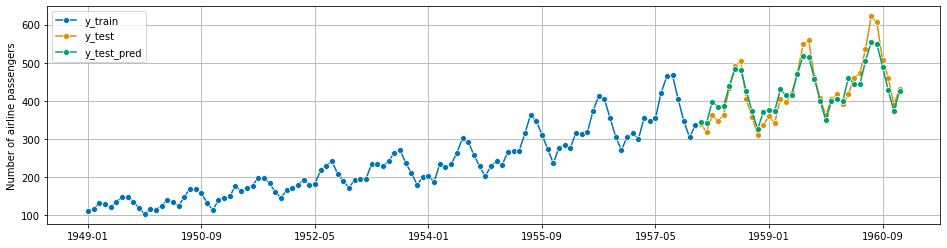

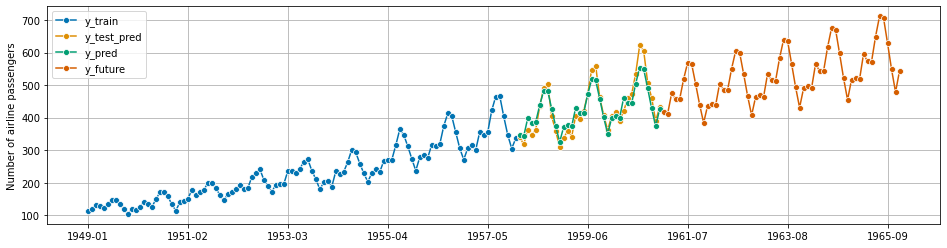

In [63]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=12)),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
        (
            "forecast",
            make_reduction(
                LinearRegression(),
                scitype="tabular-regressor",
                window_length=12,
                strategy="recursive"
            ),
        ),
    ]
)

forecaster.fit(y_train)
y_pred_test = forecaster.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

fh_future = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=12 * 5, freq="M")),is_relative=False
)

y_future = forecaster.predict(fh_future)

plot_series(y_train, y_test, y_test_pred, y_future, labels=["y_train", "y_test_pred", "y_pred", "y_future"])
plt.grid()

In [64]:
forecaster.get_params()

{'steps': [('deseasonalize', Deseasonalizer(model='multiplicative', sp=12)),
  ('detrend', Detrender(forecaster=PolynomialTrendForecaster())),
  ('forecast',
   RecursiveTabularRegressionForecaster(estimator=LinearRegression(),
                                        window_length=12))],
 'deseasonalize': Deseasonalizer(model='multiplicative', sp=12),
 'detrend': Detrender(forecaster=PolynomialTrendForecaster()),
 'forecast': RecursiveTabularRegressionForecaster(estimator=LinearRegression(),
                                      window_length=12),
 'deseasonalize__model': 'multiplicative',
 'deseasonalize__sp': 12,
 'detrend__forecaster__degree': 1,
 'detrend__forecaster__regressor': None,
 'detrend__forecaster__with_intercept': True,
 'detrend__forecaster': PolynomialTrendForecaster(),
 'forecast__estimator__copy_X': True,
 'forecast__estimator__fit_intercept': True,
 'forecast__estimator__n_jobs': None,
 'forecast__estimator__normalize': 'deprecated',
 'forecast__estimator__positive'

# Grid Search

RMSE: 51.56756034519248


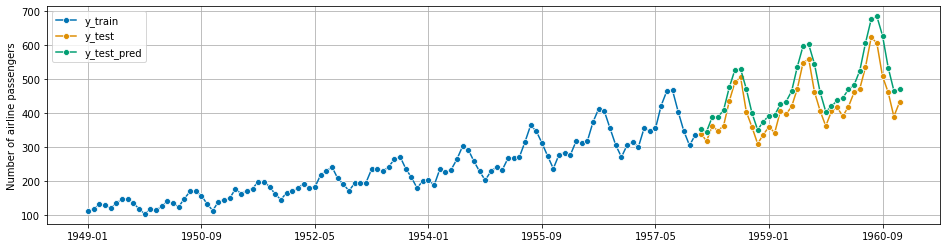

In [65]:
from sklearn.linear_model import LinearRegression
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter
)

regressor = LinearRegression()
forecaster = make_reduction(regressor, window_length=15, strategy="recursive", scitype="infer")
param_grid = {"window_length": [7, 12, 15]}
cv = SlidingWindowSplitter(
    initial_window=int(len(y_train) * 0.8),
    window_length=20
)

gscv = ForecastingGridSearchCV(
    forecaster=forecaster,
    strategy="refit",
    cv=cv,
    param_grid=param_grid
)

gscv.fit(y_train)
y_test_pred = gscv.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

# Get Params

RMSE: 51.56756034519248


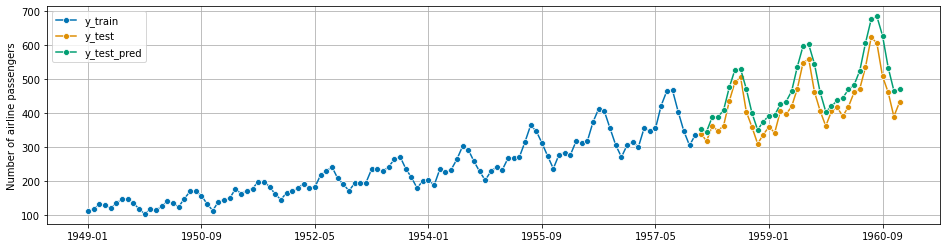

In [66]:
from sklearn.linear_model import LinearRegression
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter
)

param_grid = {
    "window_length": [7, 12, 15]
}

regressor = LinearRegression()
forecaster = make_reduction(
    estimator=regressor,
    scitype="tabular-regressor",
    strategy="recursive"
)

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=30)
gscv = ForecastingGridSearchCV(forecaster=forecaster, cv=cv, param_grid=param_grid)

gscv.fit(y_train)
y_test_pred = gscv.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

In [67]:
forecaster.get_params()

{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'window_length': 10}

# GridSearchCV

RMSE: 81.1824077823104


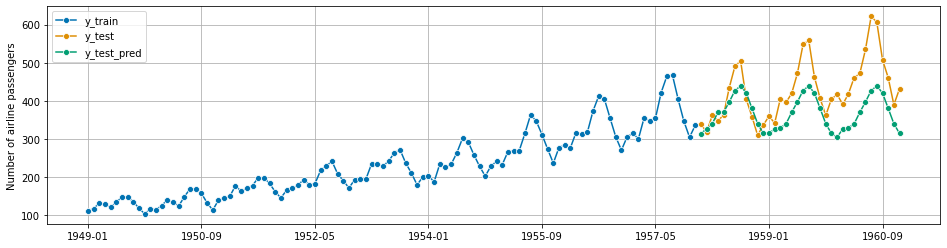

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

regressor_param_grid = {"n_neighbors": np.arange(1, 10)}
forecaster_param_grid = {"window_length": [7, 12, 15]}

regressor = GridSearchCV(
    KNeighborsRegressor(),
    param_grid=regressor_param_grid,
)

forecaster = make_reduction(
    estimator=regressor,
    scitype="tabular-regressor",
    strategy="recursive"
)

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=30)
gscv = ForecastingGridSearchCV(forecaster=forecaster, cv=cv, param_grid=forecaster_param_grid)
gscv.fit(y_train)
y_test_pred = gscv.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

In [69]:
gscv.cv_results_.sort_values(by="rank_test_MeanAbsolutePercentageError")

,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
2,0.074228,0.051002,0.002359,{'window_length': 15},1.0
1,0.082279,0.057224,0.002494,{'window_length': 12},2.0
0,0.113928,0.059836,0.002416,{'window_length': 7},3.0


RMSE: 75.81389657299147


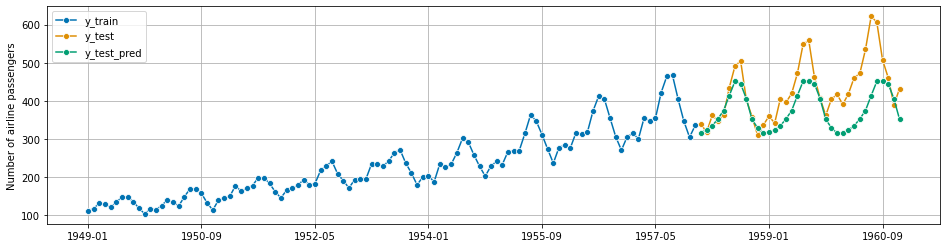

In [70]:
from sktime.performance_metrics.forecasting import MeanSquaredError

mse = MeanSquaredError()
param_grid = {"window_length": [7, 12, 15]}
regressor = KNeighborsRegressor()
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.8), window_length=30)
gscv = ForecastingGridSearchCV(forecaster=forecaster, cv=cv, param_grid=param_grid, scoring=mse)
gscv.fit(y_train)
y_test_pred = gscv.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

In [71]:
gscv.cv_results_.sort_values(by="rank_test_MeanSquaredError")

,mean_test_MeanSquaredError,mean_fit_time,mean_pred_time,params,rank_test_MeanSquaredError
1,1134.999053,0.052428,0.002139,{'window_length': 12},1.0
2,1285.133614,0.051015,0.002093,{'window_length': 15},2.0
0,2600.750255,0.056377,0.002217,{'window_length': 7},3.0


In [72]:
from sktime.forecasting.compose import MultiplexForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster

forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="last")),
        ("ets", ExponentialSmoothing(trend="add", sp=12))
    ]
)

# forecaster.set_params(**{"selected_forecaster": "naive"})
# forecaster.set_params(**{"selected_forecaster": "ets"})

In [73]:
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter
)

forecaster = MultiplexForecaster(
    forecasters=[
        ("naive", NaiveForecaster(strategy="last")),
        ("ets", ExponentialSmoothing(trend="add", sp=12))
    ]
)

cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.5), window_length=30)
forecaster_param_grid = {"selected_forecaster": ["ets", "naive"]}
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=forecaster_param_grid)
gscv.fit(y_train)
y_test_pred = gscv.predict(fh)


RMSE: 121.13857996342682


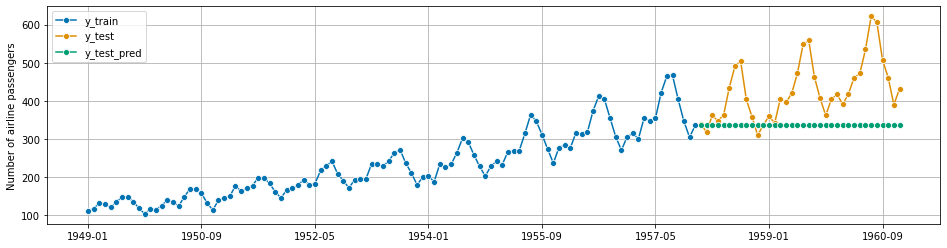

In [74]:
forecaster.set_params(**{"selected_forecaster": "naive"})
forecast(forecaster, fh, y_train, y_test, y_test_pred)

In [75]:
gscv.best_forecaster_

MultiplexForecaster(forecasters=[('naive', NaiveForecaster()),
                                 ('ets',
                                  ExponentialSmoothing(sp=12, trend='add'))],
                    selected_forecaster='naive')

In [76]:
gscv.cv_results_.sort_values(by="rank_test_MeanAbsolutePercentageError")

,mean_test_MeanAbsolutePercentageError,mean_fit_time,mean_pred_time,params,rank_test_MeanAbsolutePercentageError
1,0.092771,0.004906,0.002446,{'selected_forecaster': 'naive'},1.0
0,0.094061,0.022874,0.002338,{'selected_forecaster': 'ets'},2.0


# OptionalPassthrough

RMSE: 87.72512915435708


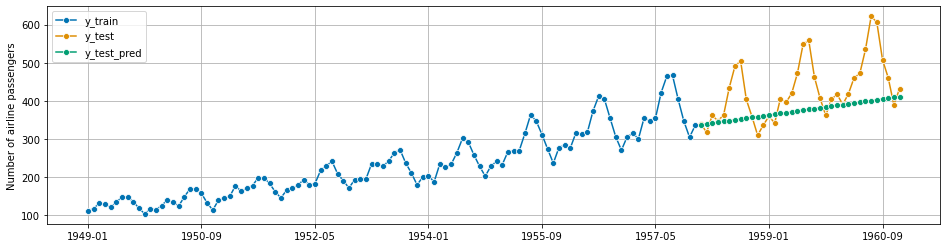

In [77]:
from sklearn.preprocessing import StandardScaler
from sktime.datasets import load_airline
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter
)
from sktime.forecasting.naive import NaiveForecaster
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sktime.transformations.series.compose import OptionalPassthrough
from sktime.transformations.series.detrend import Deseasonalizer

# Create Pipeline
pipe = TransformedTargetForecaster(
    steps=[
        ("deseasonalizer", OptionalPassthrough(Deseasonalizer())),
        ("scaler", OptionalPassthrough(TabularToSeriesAdaptor(StandardScaler()))),
        ("forecaster", NaiveForecaster())
    ]
)

# Putting it all together in a grid search
cv = SlidingWindowSplitter(
    initial_window=60,
    window_length=24,
    start_with_window=True,
    step_length=24
)

param_grid = {
    "deseasonalizer__passthrough": [True, False],
    "scaler__transformer__transformer__with_mean": [True, False],
    "scaler__passthrough": [True, False],
    "forecaster__strategy": ["drift", "mean", "last"]
}

gscv = ForecastingGridSearchCV(forecaster=pipe, param_grid=param_grid, cv=cv, n_jobs=-1)
gscv.fit(y_train)
y_test_pred = gscv.predict(fh)
forecast(gscv, fh, y_train, y_test, y_test_pred)

RMSE: 106.0042243563077


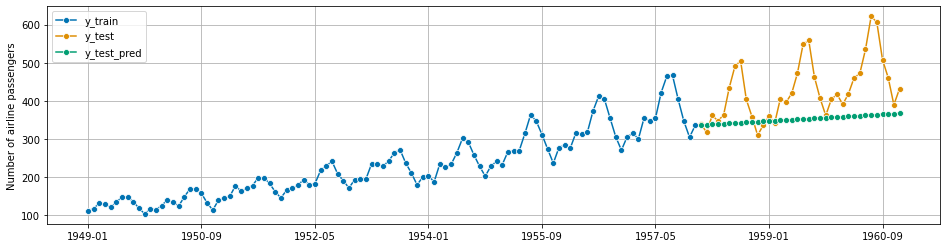

In [78]:
from sktime.forecasting.compose import EnsembleForecaster

ses = ExponentialSmoothing(sp=12)
holt = ExponentialSmoothing(trend="add", damped_trend=False, sp=12)
damped = ExponentialSmoothing(trend="add", damped_trend=True, sp=12)

forecaster = EnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped)
    ]
)

forecaster.fit(y_train)
y_test_pred = forecaster.predict(fh)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

RMSE: 50.34269596247917


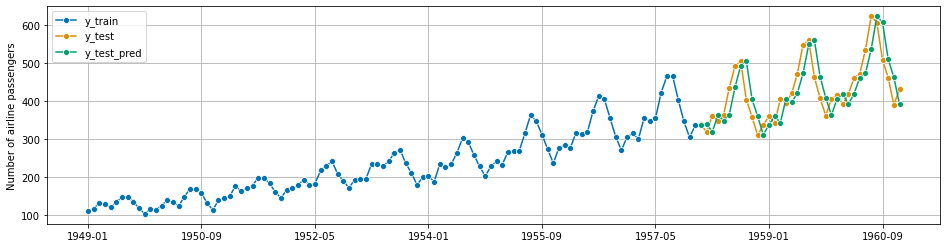

In [79]:
from sktime.forecasting.all import mean_squared_error
from sktime.forecasting.online_learning import (
    NormalHedgeEnsemble,
    OnlineEnsembleForecaster
)

hedge_expert = NormalHedgeEnsemble(n_estimators=3, loss_func=mean_squared_error)

forecaster = OnlineEnsembleForecaster(
    [
        ("ses", ses),
        ("holt", holt),
        ("damped", damped)
    ]
)

forecaster.fit(y=y_train, fh=fh)
y_test_pred = forecaster.update_predict_single(y_test)
forecast(forecaster, fh, y_train, y_test, y_test_pred)

In [80]:
forecaster.get_params

<bound method _HeterogenousEnsembleForecaster.get_params of OnlineEnsembleForecaster(forecasters=[('ses', ExponentialSmoothing(sp=12)),
                                      ('holt',
                                       ExponentialSmoothing(sp=12,
                                                            trend='add')),
                                      ('damped',
                                       ExponentialSmoothing(damped_trend=True,
                                                            sp=12,
                                                            trend='add'))])>

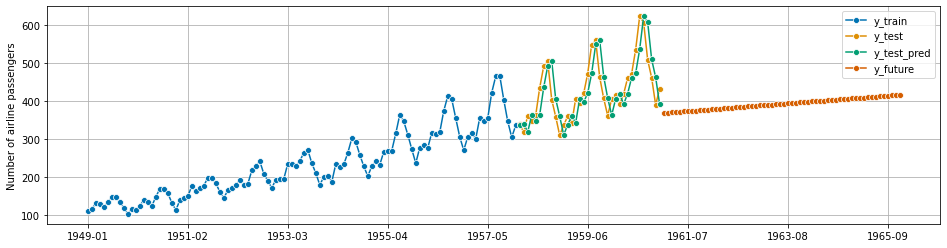

In [81]:
y_future = forecaster.predict(fh_future)
plot_series(y_train, y_test, y_test_pred, y_future, labels=["y_train", "y_test", "y_test_pred", "y_future"])
plt.grid()

In [95]:
import plotly.express as px

df = px.data.stocks()

fig = px.line(data_frame=df, x="date", y="GOOG", markers=True)
fig.show()

In [98]:
fig = px.line(x=y.index.to_timestamp(),
              y=y,
              labels={
                  "y": "Number of Passengers",
                  "x": "Date"
              },
              markers=True
             )

fig.update_layout(
    title={
        'text': "Airline Passengers",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

fig.show()